In [4]:
# import needed libraries 
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# load in dataset 
dataset_path = 'coe379L-sp25/datasets/unit03/Project3'

batch_size = 32
img_height = 128
img_width = 128

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 21322 files belonging to 2 classes.
Using 17058 files for training.
Found 21322 files belonging to 2 classes.
Using 4264 files for validation.


In [6]:
# check class names for dataset
class_names = train_ds.class_names
print(class_names)

['damage', 'no_damage']


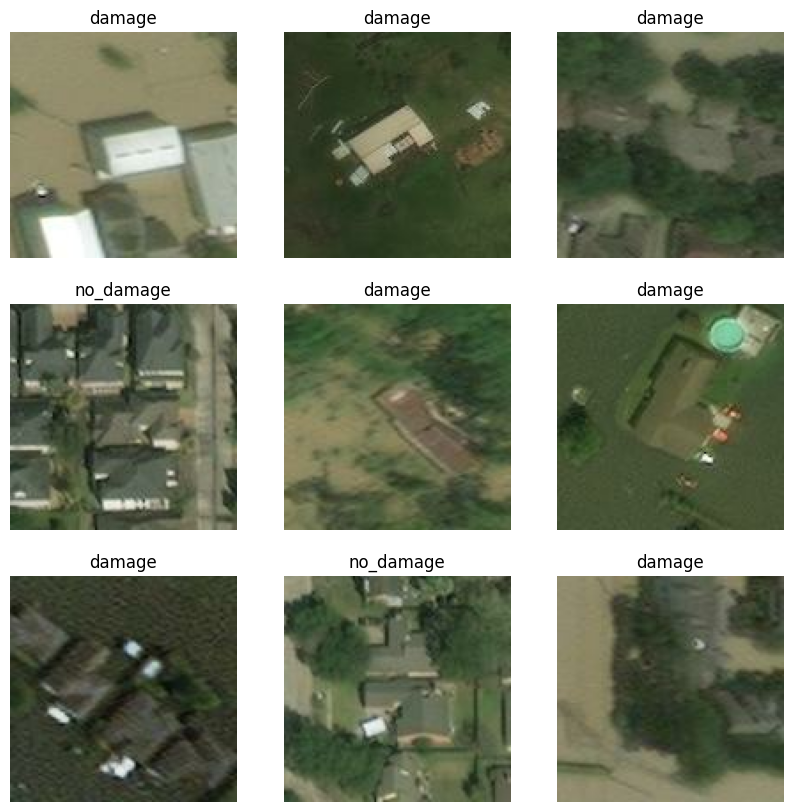

In [7]:
# print some pictures to check the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
from tensorflow.keras import layers
# data augmentation and normalization  

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
])

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [9]:
from tensorflow.keras import Sequential, layers, optimizers
# Fully Connected ANN

ann_model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer=optimizers.Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [10]:
# Lenet-5 CNN architecture

lenet_model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

lenet_model.compile(optimizer=optimizers.Adam(),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [11]:
# Alternate-Lenet-5 CNN architecture

alt_lenet_model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

alt_lenet_model.compile(optimizer=optimizers.Adam(),
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

In [11]:
epochs = 10

history_ann = ann_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

history_lenet = lenet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

history_alt_lenet = alt_lenet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
534/534 [==============================] - 16s 27ms/step - loss: 0.6909 - accuracy: 0.6734 - val_loss: 0.5693 - val_accuracy: 0.7200
Epoch 2/10
534/534 [==============================] - 17s 31ms/step - loss: 0.6000 - accuracy: 0.6909 - val_loss: 0.6523 - val_accuracy: 0.6499
Epoch 3/10
534/534 [==============================] - 17s 31ms/step - loss: 0.6231 - accuracy: 0.6682 - val_loss: 0.6166 - val_accuracy: 0.6499
Epoch 4/10
534/534 [==============================] - 16s 30ms/step - loss: 0.5981 - accuracy: 0.6682 - val_loss: 0.5953 - val_accuracy: 0.6499
Epoch 5/10
534/534 [==============================] - 17s 32ms/step - loss: 0.5794 - accuracy: 0.6796 - val_loss: 0.6117 - val_accuracy: 0.6677
Epoch 6/10
534/534 [==============================] - 15s 27ms/step - loss: 0.5732 - accuracy: 0.7208 - val_loss: 0.6760 - val_accuracy: 0.6674
Epoch 7/10
534/534 [==============================] - 14s 26ms/step - loss: 0.5821 - accuracy: 0.6954 - val_loss: 0.5748 - val_accuracy:

In [12]:
# testing accuracy

test_loss_ann, test_acc_ann = ann_model.evaluate(val_ds)
test_loss_lenet, test_acc_lenet = lenet_model.evaluate(val_ds)
test_loss_alt_lenet, test_acc_alt_lenet = alt_lenet_model.evaluate(val_ds)

print(f"ANN Test Accuracy: {test_acc_ann:.4f}")
print(f"LeNet-5 Test Accuracy: {test_acc_lenet:.4f}")
print(f"Alternate LeNet-5 Test Accuracy: {test_acc_alt_lenet:.4f}")

134/134 [==============================] - 6s 47ms/step - loss: 0.1572 - accuracy: 0.9636
ANN Test Accuracy: 0.7397
LeNet-5 Test Accuracy: 0.9341
Alternate LeNet-5 Test Accuracy: 0.9636


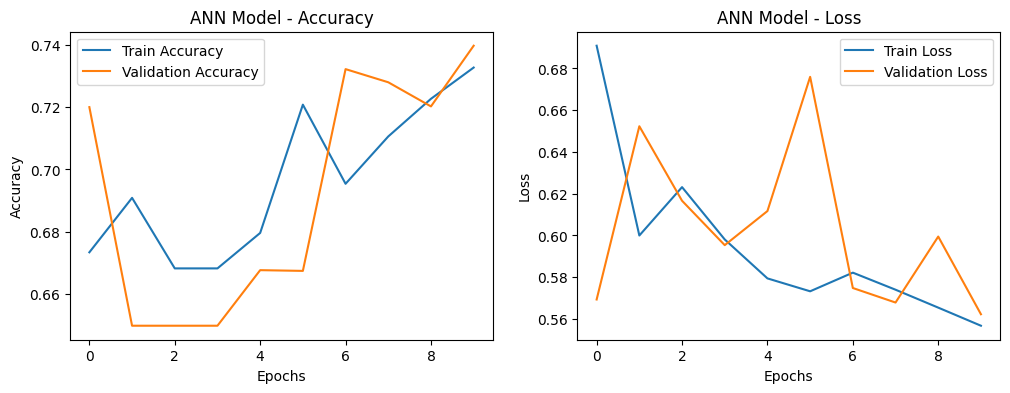

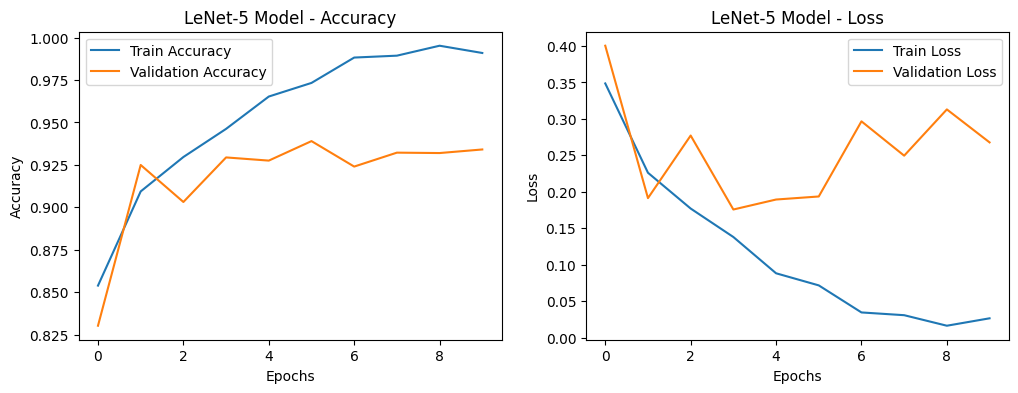

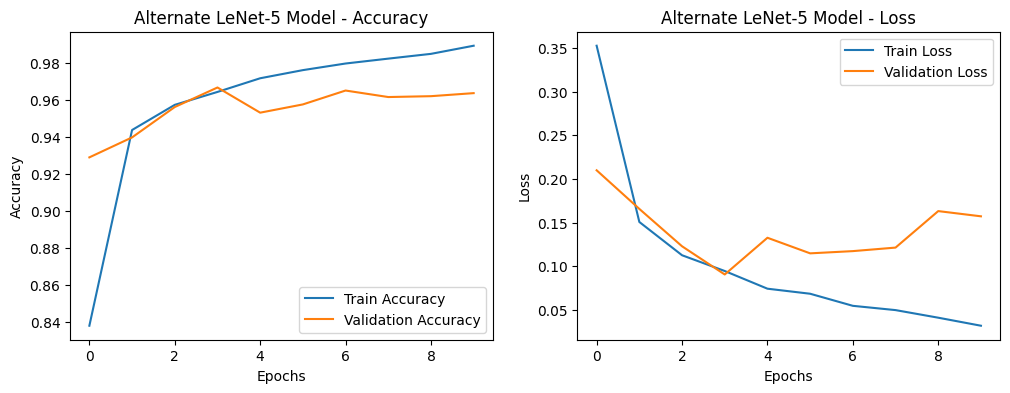

In [13]:
import matplotlib.pyplot as plt

def plot_metrics(history, title):
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot performance for each model
plot_metrics(history_ann, "ANN Model")
plot_metrics(history_lenet, "LeNet-5 Model")
plot_metrics(history_alt_lenet, "Alternate LeNet-5 Model")

In [15]:
best_model = None
best_accuracy = max(test_acc_ann, test_acc_lenet, test_acc_alt_lenet)

if best_accuracy == test_acc_ann:
    best_model = ann_model
    model_name = "ANN Model"
elif best_accuracy == test_acc_lenet:
    best_model = lenet_model
    model_name = "LeNet-5 Model"
else:
    best_model = alt_lenet_model
    model_name = "Alternate LeNet-5 Model"

print(f"Best Model: {model_name} with Accuracy: {best_accuracy:.4f}")


Best Model: Alternate LeNet-5 Model with Accuracy: 0.9636


In [17]:
# Save and deploy the best model in native Keras format
best_model.save('best_damage_classification_model.keras')
print("Saved the best model as 'best_damage_classification_model.keras'")

Saved the best model as 'best_damage_classification_model.keras'
